## Numeričko iznalaženje optimalne strategije upravljanja, bez ograničenja na upravljanje


### Postavka problema

Numerički izračunati optimalnu strategiju upravljanja i kretanje u prostoru stanja. Proces je opisan diferencijalnom jednačinom

$$\ddot{x} - x = u$$

uz početne uslove $\mathbf{x}(0) = 1$. Kriterijum optimalnosti je u sledećoj formi

$$\int_{0}^{1}{u^{2} \text{ } dt}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
Ts = 0.001
ts = 0
tf = 1
t = np.arange(ts, tf + Ts, Ts)

N = len(t)

In [3]:
x1_0 = 1
x2_0 = 1

x = np.zeros((N, 2))
x[0, 0] = x1_0
x[0, 1] = x2_0

p = np.zeros((N, 2))
u = np.ones((N, 1))  # Inicijalno pogađanje upravljanja

In [4]:
def dot_x1(x: np.ndarray, u: np.float64) -> np.float64:
    return x[1]


def dot_x2(x: np.ndarray, u: np.float64) -> np.float64:
    return x[0] + u

In [5]:
def dot_p1(x: np.ndarray, p: np.ndarray, u: np.float64) -> np.float64:
    return -p[1]


def dot_p2(x: np.ndarray, p: np.ndarray, u: np.float64) -> np.float64:
    return -p[0]

In [ ]:
eps = 1e-5
iters = 0
w = 0.9

while iters <= 1000:
    iters += 1
    print(f"Iteration {iters}...")
    u_old = u.copy()

    for k in range(N - 1):
        xp_1 = x[k, 0] + Ts * dot_x1(x[k], u[k])
        xp_2 = x[k, 1] + Ts * dot_x2(x[k], u[k])

        xp = [xp_1, xp_2]

        x[k + 1, 0] = x[k, 0] + Ts / 2 * (dot_x1(x[k], u[k]) + dot_x1(xp, u[k + 1]))
        x[k + 1, 1] = x[k, 1] + Ts / 2 * (dot_x2(x[k], u[k]) + dot_x2(xp, u[k + 1]))

    for k in range(N - 1):
        p[N - 2 - k, 0] = p[N - 1 - k, 0] - Ts * dot_p1(
            x[N - 1 - k], p[N - 1 - k], u[N - 1 - k]
        )
        p[N - 2 - k, 1] = p[N - 1 - k, 1] - Ts * Ts * dot_p2(
            x[N - 1 - k], p[N - 1 - k], u[N - 1 - k]
        )

    for k in range(N):
        u_new = -p[k, 1] / 2
        u[k] = w**iters * u[k] + (1 - w**iters) * u_new  # Radi brže konvergencije!

    if sum(np.abs(u - u_old)) - eps * sum(np.abs(u)) <= 0:
        break

Iteration 1...
Iteration 2...
Iteration 3...
Iteration 4...
Iteration 5...
Iteration 6...
Iteration 7...
Iteration 8...
Iteration 9...
Iteration 10...
Iteration 11...
Iteration 12...
Iteration 13...
Iteration 14...
Iteration 15...
Iteration 16...
Iteration 17...
Iteration 18...
Iteration 19...
Iteration 20...
Iteration 21...
Iteration 22...
Iteration 23...
Iteration 24...
Iteration 25...
Iteration 26...
Iteration 27...
Iteration 28...
Iteration 29...
Iteration 30...
Iteration 31...
Iteration 32...
Iteration 33...
Iteration 34...
Iteration 35...
Iteration 36...
Iteration 37...
Iteration 38...
Iteration 39...
Iteration 40...
Iteration 41...
Iteration 42...
Iteration 43...
Iteration 44...
Iteration 45...
Iteration 46...
Iteration 47...
Iteration 48...
Iteration 49...
Iteration 50...
Iteration 51...
Iteration 52...
Iteration 53...
Iteration 54...
Iteration 55...
Iteration 56...
Iteration 57...
Iteration 58...
Iteration 59...
Iteration 60...
Iteration 61...
Iteration 62...
Iteration 63...
I

In [11]:
plt.rcParams["text.usetex"] = True

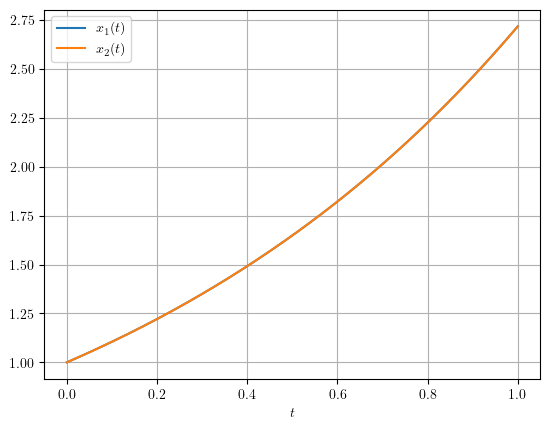

In [12]:
plt.plot(t, x)
plt.grid()
plt.legend([r"$x_{1}(t)$", r"$x_{2}(t)$"])
plt.xlabel(r"$t$")
plt.savefig("z6_ss.png", dpi=300)

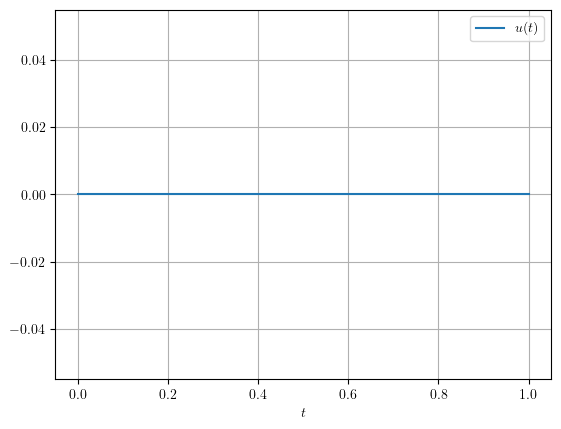

In [14]:
plt.plot(t, u)
plt.grid()
plt.xlabel(r"$t$")
plt.legend([r"$u(t)$"])
plt.savefig("z6_control.png", dpi=300)


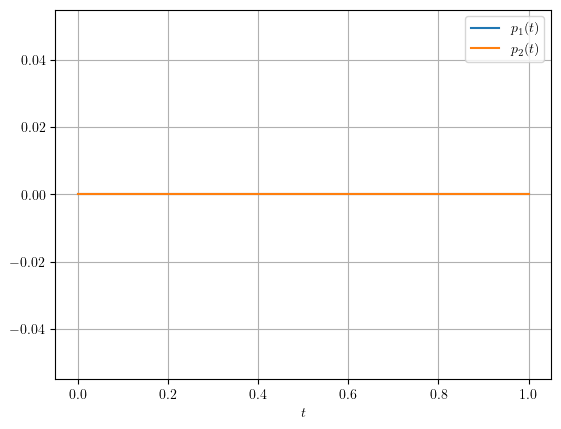

In [15]:
plt.plot(t, p)
plt.grid()
plt.legend([r"$p_{1}(t)$", r"$p_{2}(t)$"])
plt.xlabel(r"$t$")
plt.savefig("z6_imp.png", dpi=300)
